<a href="https://colab.research.google.com/github/Zayed-Rahat/ML_Lab_university/blob/main/1804088_backpropagation_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from csv import reader
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import random
import matplotlib.pyplot as plt
import math

In [ ]:
def load_dataset(dataset_path, n_train_data):
    dataset = []
    label_dict = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    with open(dataset_path, 'r') as file:
       # Read the CSV file, separated by commas
        csv_reader = reader(file, delimiter=',')
        for row in csv_reader:
            # convert string type values ​​to float type
            row[0:4] = list(map(float, row[0:4]))
            # Replace labels with integers
            row[4] = label_dict[row[4]]
            # Add the processed data to the dataset
            dataset.append(row)

    # Normalize the data
    dataset = np.array(dataset)
    mms = MinMaxScaler()
    for i in range(dataset.shape[1] - 1):
        dataset[:, i] = mms.fit_transform(dataset[:, i].reshape(-1, 1)).flatten()

   # Convert the class label to an integer
    dataset = dataset.tolist()
    for row in dataset:
        row[4] = int(row[4])
  #  Shuffle the dataset
    random.shuffle(dataset)

    # Divide training set and validation set
    train_data = dataset[0:n_train_data]
    val_data = dataset[n_train_data:]

    return train_data, val_data

In [ ]:
def fun_z(weights, inputs):
    """Calculate the input of the neuron: z = weight * inputs + b
    :param weights: Network parameters (weight matrix and bias term)
    :param inputs: the output of neurons in the previous layer
    :return: the input of the neuron in the current layer
    """
    bias_term = weights[-1]
    z = 0
    for i in range(len(weights)-1):
        z += weights[i] * inputs[i]
    z += bias_term
    return z

In [ ]:
def sigmoid(z):
    """Activation function (Sigmoid): f(z) = Sigmoid(z)
    :param z: the input of the neuron
    :return: the output of the neuron
    """
    return 1.0 / (1.0 + math.exp(-z))


def sigmoid_derivative(output):
    """Sigmoid activation function derivation
    :param output: the output value of the activation function
    :return: Derivation calculation result
    """
    return output * (1.0 - output)

In [ ]:
def forward_propagate(network, inputs):
    """Forward propagation computation
    :param network: neural network
    :param inputs: a sample data
    :return: The result of the forward propagation calculation
    """
    for layer in network:  # Loop through each layer
        new_inputs = []
        for neuron in layer: # loop through each neuron in each layer
            z = fun_z(neuron['weights'], inputs)
            neuron['output'] = sigmoid(z)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

In [ ]:

def backward_propagate_error(network, actual_label):
    """error backpropagation
    :param network: neural network
    :param actual_label: actual label value
    :return
    """
    for i in reversed(range(len(network))):  # Calculate the error from the last layer
        layer = network[i]
        errors = list()
        if i != len(network)-1:  # not output layer
            for j in range(len(layer)):  # Calculate the error of each neuron
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else: # output layer
            for j in range(len(layer)):  # Calculate the error of each neuron
                neuron = layer[j]
                errors.append(actual_label[j] - neuron['output'])
      # Calculate the error term delta
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * sigmoid_derivative(neuron['output'])


In [ ]:

def update_parameters(network, row, l_rate):
    """Use the error to update the parameters of the neural network (weight matrix and bias term)
    :param network: neural network
    :param row: a sample data
    :param l_rate: learning rate
    :return:
    """
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0: # Get the output of the previous layer network
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            # update the weight matrix
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            # update bias
            neuron['weights'][-1] += l_rate * neuron['delta']


In [ ]:

def initialize_network(n_inputs, n_hidden, n_outputs):
    """Initialize the BP network (initialize the parameters of the hidden layer and output layer: weight matrix and bias items)
    :param n_inputs: number of feature columns
    :param n_hidden: the number of neurons in the hidden layer
    :param n_outputs: The number of neurons in the output layer, that is, the total number of categories for classification
    :return: The initialized neural network
    """
    network = list()
   # hidden layer
    hidden_layer = [{'weights': [random.random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    # output layer
    output_layer = [{'weights': [random.random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network



In [ ]:

def train(train_data, l_rate, epochs, n_hidden, val_data):
    """Train the neural network (iterate n_epoch rounds)
    :param train_data: training set
    :param l_rate: learning rate
    :param epochs: the number of iterations
    :param n_hidden: the number of neurons in the hidden layer
    :param val_data: validation set
    :return: trained network
    """
    # Get the number of feature columns
    n_inputs = len(train_data[0]) - 1
    # Get the total number of categories classified
    n_outputs = len(set([row[-1] for row in train_data]))
    # Initialize the network
    network = initialize_network(n_inputs, n_hidden, n_outputs)

    acc = []
    for epoch in range(epochs):  # Train for epochs rounds
        for row in train_data:
           # Feedforward calculation
            _ = forward_propagate(network, row)
            # Process the class label to calculate the error
            actual_label = [0 for i in range(n_outputs)]
            actual_label[row[-1]] = 1
           # Error backpropagation calculation
            backward_propagate_error(network, actual_label)
            # Update parameters
            update_parameters(network, row, l_rate)
        # Save the accuracy of the current epoch model on the validation set
        # print(acc)
        acc.append(validation(network, val_data))
    # Plot the change in accuracy of the model on the validation set during training
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(acc)
    plt.show()

    return network

In [ ]:
def validation(network, val_data):
    # get prediction class label
    predicted_label = []
    for row in val_data:
        prediction = predict(network, row)
        predicted_label.append(prediction)
    # Get the actual class label
    actual_label = [row[-1] for row in val_data]
    # calculate accuracy
    accuracy = accuracy_calculation(actual_label, predicted_label)
    # print("The actual class label of the test set:", actual_label)
    # print("Predicted label on test set:", predicted_label)
    return accuracy


In [ ]:
def accuracy_calculation(actual_label, predicted_label):
    correct_count = 0
    for i in range(len(actual_label)):
        if actual_label[i] == predicted_label[i]:
            correct_count += 1
    return correct_count / float(len(actual_label)) * 100.0


def predict(network, row):
    """Use the model to make predictions on the current input data
    :param network: neural network
    :param row: a data sample
    :return: prediction result
    """
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))

**Predict function takes a trained neural network model and a data sample as input. It uses the forward_propagate function to obtain the output values of the network for the given input, and then it returns the index of the maximum output value as the predicted class or category for the input data sample. This function is typically used to apply the trained neural network to new, unseen data samples for making predictions.**

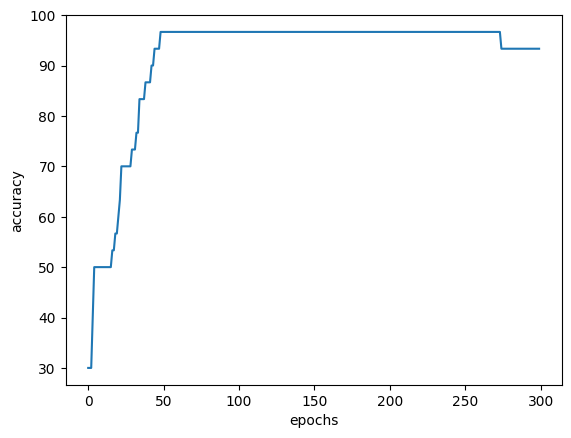

In [ ]:
file_path = './iris.csv'

# parameter settings
l_rate = 0.2
epochs = 300
n_hidden = 4  # The number of neurons in the hidden layer
n_train_data = 120  # The size of the training set (a total of 150 data, 130 training sets, 20 validation sets)

   # Load the data and divide the training set and validation set
train_data, val_data = load_dataset(file_path, n_train_data)
   # train the model
network = train(train_data, l_rate, epochs, n_hidden, val_data)